Total rows: 4721
Rows per label:
label
0    2221
1    2500
Name: count, dtype: int64


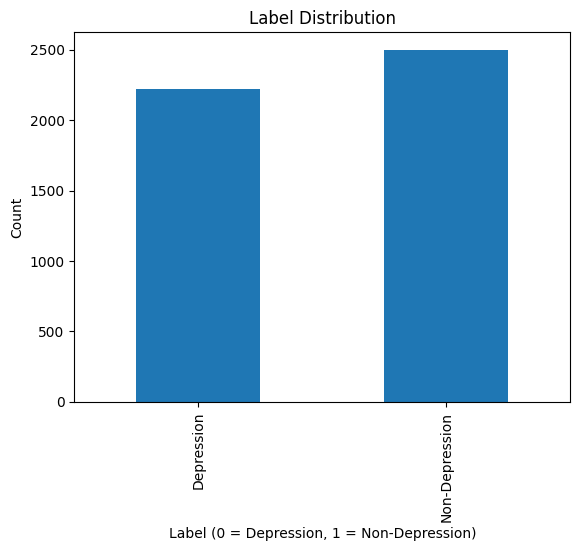

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fullDataset.csv')

total_rows = len(df)
print(f"Total rows: {total_rows}")

label_counts = df['label'].value_counts().sort_index()
print("Rows per label:")
print(label_counts)

label_names = {0: 'Depression', 1: 'Non-Depression'}
label_counts.index = [label_names.get(i, i) for i in label_counts.index]

label_counts.plot(kind='bar')
plt.xlabel('Label (0 = Depression, 1 = Non-Depression)')
plt.ylabel('Count')
plt.title('Label Distribution')
plt.show()

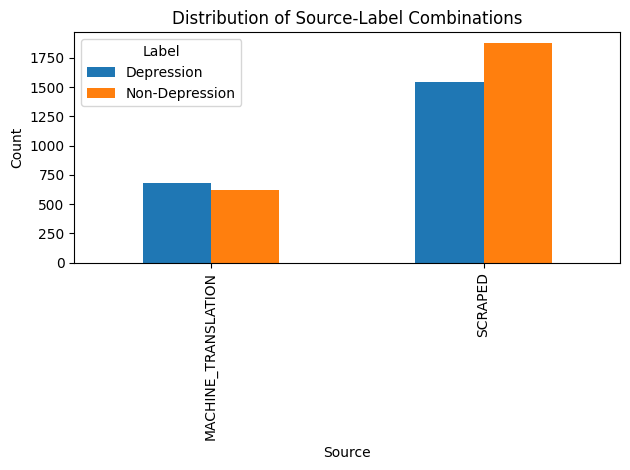

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('fullDataset.csv')

label_names = {0: 'Depression', 1: 'Non-Depression'}
df['label_name'] = df['label'].map(label_names)

combo_counts = df.groupby(['source', 'label_name']).size().unstack(fill_value=0)

combo_counts.plot(kind='bar', stacked=False)
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Distribution of Source-Label Combinations')
plt.legend(title='Label')
plt.tight_layout()
plt.show()

In [11]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy

nlp = spacy.load('ro_core_news_sm')


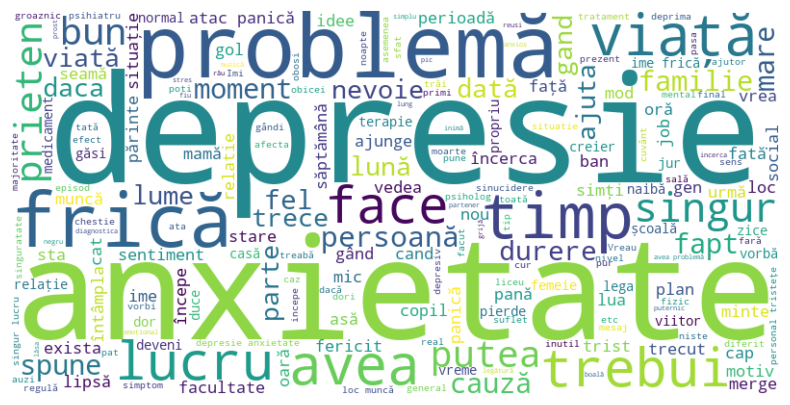

In [14]:
sentences = df[df['label'] == 0]['sentence']

selected_words = []
for sentence in sentences:
    doc = nlp(sentence)
    for token in doc:
        if token.pos_ in ['ADJ', 'NOUN', 'VERB']:  
            selected_words.append(token.lemma_)   


selected_words = [word for word in selected_words if len(word)>2]
text = ' '.join(selected_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

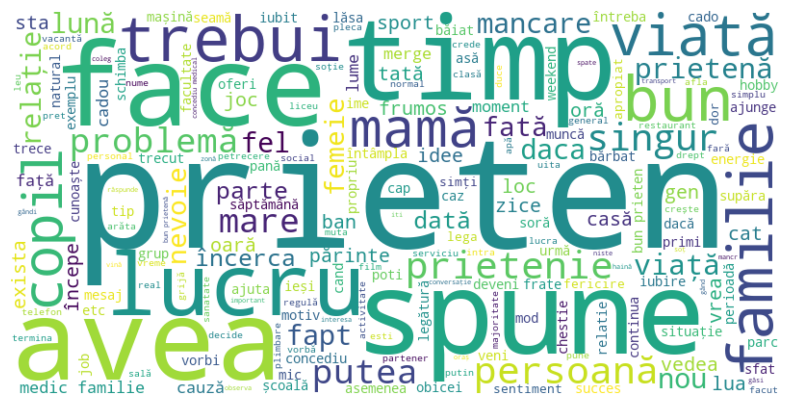

In [15]:
sentences = df[df['label'] == 1]['sentence']

selected_words = []
for sentence in sentences:
    doc = nlp(sentence)
    for token in doc:
        if token.pos_ in ['ADJ', 'NOUN', 'VERB']:  
            selected_words.append(token.lemma_)   

selected_words = [word for word in selected_words if len(word)>2]
text = ' '.join(selected_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()